In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
from torchvision.datasets import MNIST
import time
import matplotlib.pyplot as plt

In [4]:
# Configuration
print_every = 1000
record_every = 10

# 1. Download and Formatting the data
Write the code for downloading and formatting the data.

In [5]:
# Data Preproccessing
# Training data
N_train, N_test = 50000, 10000
mnist_train = MNIST(root='./data', train=True, download=True)
X_train, targets_train = mnist_train.data.view(-1,784).float(), mnist_train.targets
y_train = torch.zeros((len(targets_train),10))
for i in range(len(targets_train)):
    y_train[i, targets_train[i]] = 1

# Test data
mnist_test = MNIST(root='./data', train=False, download=True)
X_test, targets_test = mnist_test.data.view(-1,784).float(), mnist_test.targets
y_test = torch.zeros((len(targets_test),10))
for i in range(len(targets_test)):
    y_test[i, targets_test[i]] = 1


# 2. Minibatch SGD Implementation
Write the code for minibatch SGD implementation for your linear MNIST classifier.

In [6]:
# minibatch sgd
def minibatch_sgd(ITRs, B, eta):
    W = torch.zeros(784, 10)
    # W = torch.randn(784, 10)
    Loss = []
    Acc = []
    Time = []
    for ITR in range(ITRs):
        indices = random.sample(range(N_train),B)
        X_train_s, y_train_s = X_train[indices], y_train[indices] # sampling training and test data
        G = torch.mm(X_train_s.T, torch.mm(X_train_s, W) - y_train_s) / B
        W -= eta * G

        if (ITR+1) % record_every == 0:
            Time.append(ITR + 1)
            loss = 0.5 * torch.norm(torch.mm(X_train_s, W)- y_train_s) ** 2 / B
            Loss.append(loss)
            y_hat = torch.mm(X_test, W)
            target_hat = torch.max(y_hat, dim=-1)[1]
            acc = torch.sum(targets_test == target_hat)/N_test
            Acc.append(acc)
            if (ITR+1) % print_every == 0:
                print(f'Iteration: [{ITR+1}/{ITRs}], Training loss: {loss:.4f}, Test accuracy: {acc*100: .2f}%')
    return W, Loss, Acc, Time

In [29]:
# plot loss
def Plot_Loss_Acc(t, Loss, Acc):
      plt.figure(figsize=(8,3), dpi = 300)
      plt.subplot(1,2,1)
      plt.plot(t, Loss,'k')
      plt.xlabel("Iteration")
      plt.ylabel("Training loss")
      plt.subplot(1,2,2)
      plt.plot(t, Acc,'k')
      plt.xlabel("Iterations")
      plt.ylabel("Test accuracy")
      plt.tight_layout()

Iteration: [1000/1000], Training loss: 0.2293, Test accuracy:  84.60%
Training time: 0.46 sec


/var/folders/1l/s_0rbq615qb6cfhphk3n17km0000gn/T/ipykernel_80991/4222314058.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


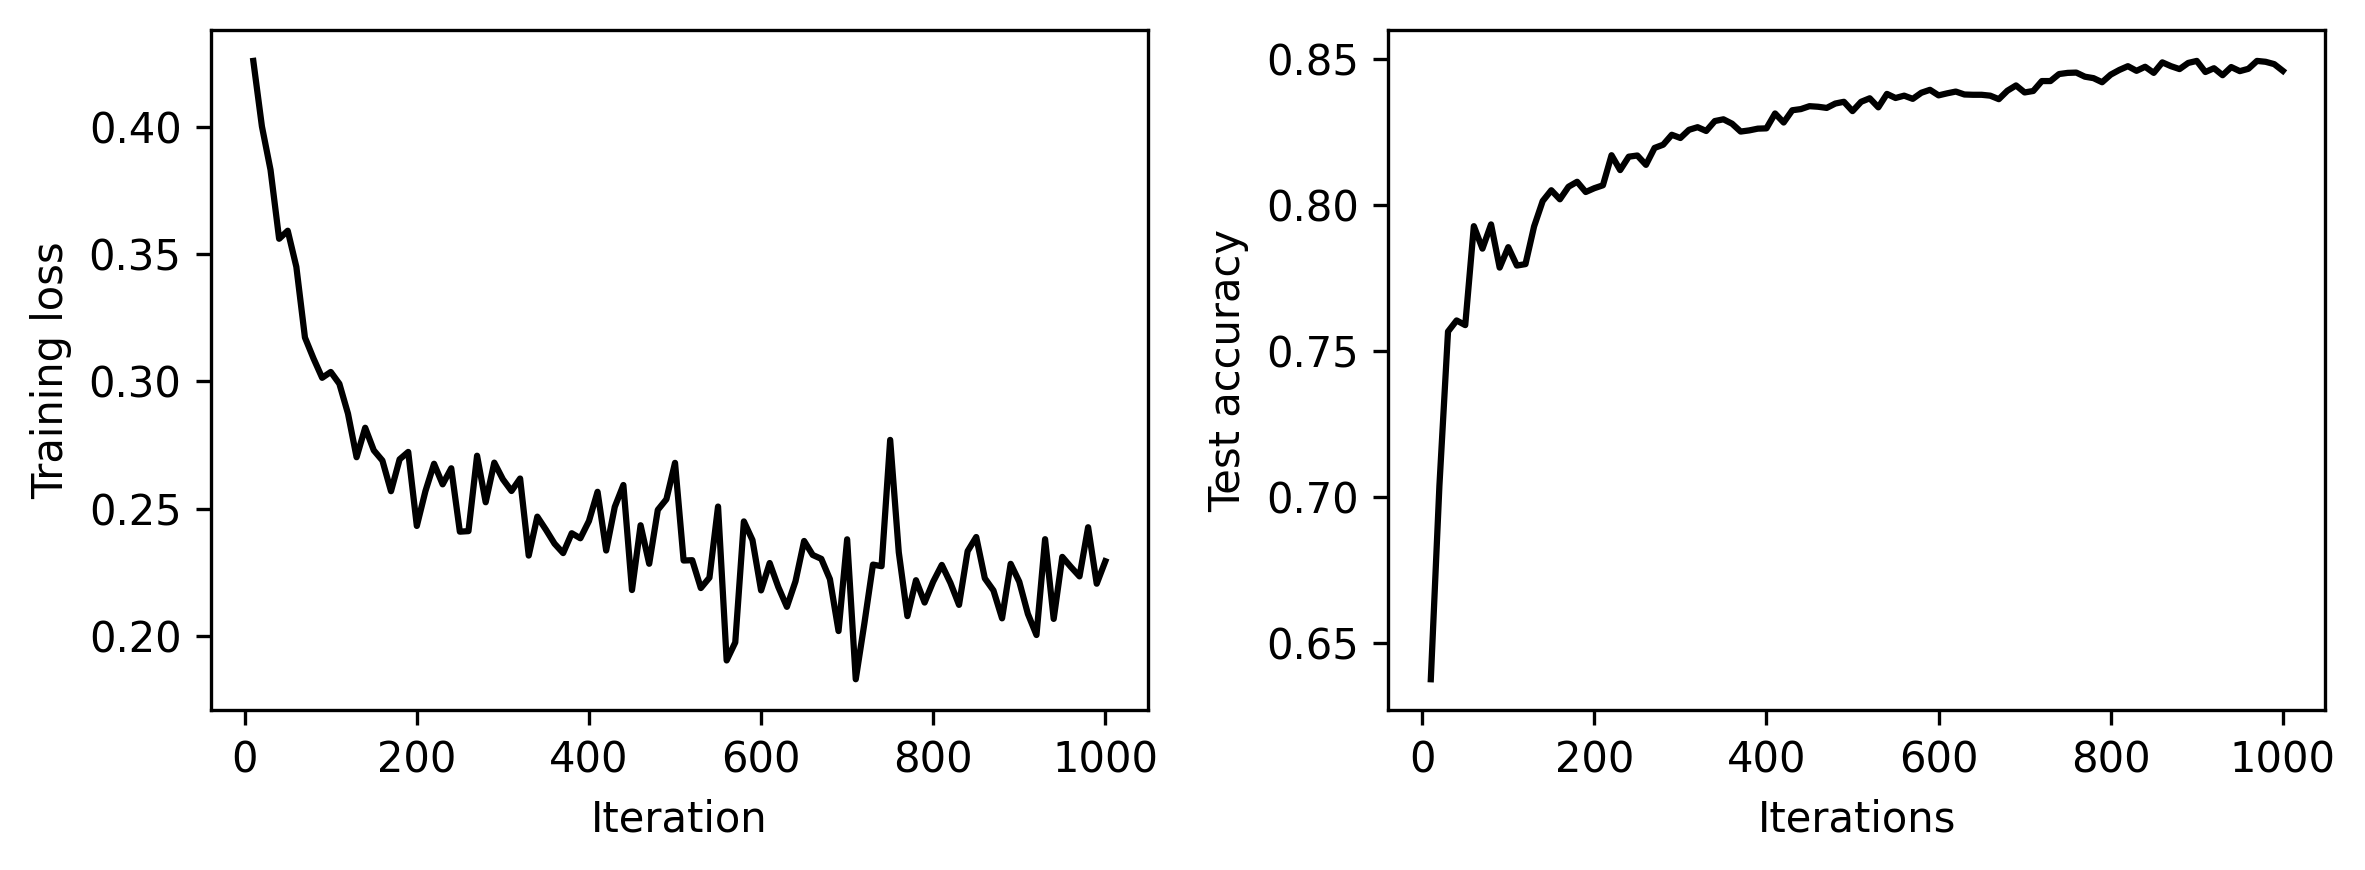

In [30]:
# SGD implementation for linear MNIST classifier.
ITRs = 1000 # Iterations
B = 100 # Batch size
eta = 5e-8 # Learning rate
tic = time.time()
_, Loss, Acc, t = minibatch_sgd(ITRs, B, eta)
toc = time.time()
print(f"Training time: {toc - tic:.2f} sec")
# plot loss
Plot_Loss_Acc(t, Loss, Acc)

# 3. The role of batch size

Run your code with batch sizes B = 1,10,100,1000. For each batch size,

• determine a good choice of learning rate;

• pick ITR sufficiently large to ensure the (approximate) convergence of the training loss;

• Plot the progress of training loss (y-axis) as a function of the iteration counter t (x-axis);

• Report how long the training takes (in seconds);

• Plot the progress of the test accuracy (y-axis) as a function of the iteration counter t (x-axis).

Iteration: [1000/80000], Training loss: 0.4461, Test accuracy:  68.40%
Iteration: [2000/80000], Training loss: 0.2762, Test accuracy:  74.97%
Iteration: [3000/80000], Training loss: 0.2685, Test accuracy:  77.20%
Iteration: [4000/80000], Training loss: 0.2086, Test accuracy:  76.21%
Iteration: [5000/80000], Training loss: 0.3163, Test accuracy:  77.67%
Iteration: [6000/80000], Training loss: 0.3981, Test accuracy:  78.93%
Iteration: [7000/80000], Training loss: 0.4437, Test accuracy:  80.31%
Iteration: [8000/80000], Training loss: 0.2561, Test accuracy:  79.49%
Iteration: [9000/80000], Training loss: 0.1135, Test accuracy:  80.47%
Iteration: [10000/80000], Training loss: 0.2370, Test accuracy:  80.85%
Iteration: [11000/80000], Training loss: 0.3056, Test accuracy:  81.68%
Iteration: [12000/80000], Training loss: 0.2034, Test accuracy:  80.77%
Iteration: [13000/80000], Training loss: 0.1034, Test accuracy:  81.48%
Iteration: [14000/80000], Training loss: 0.1236, Test accuracy:  82.19%
I

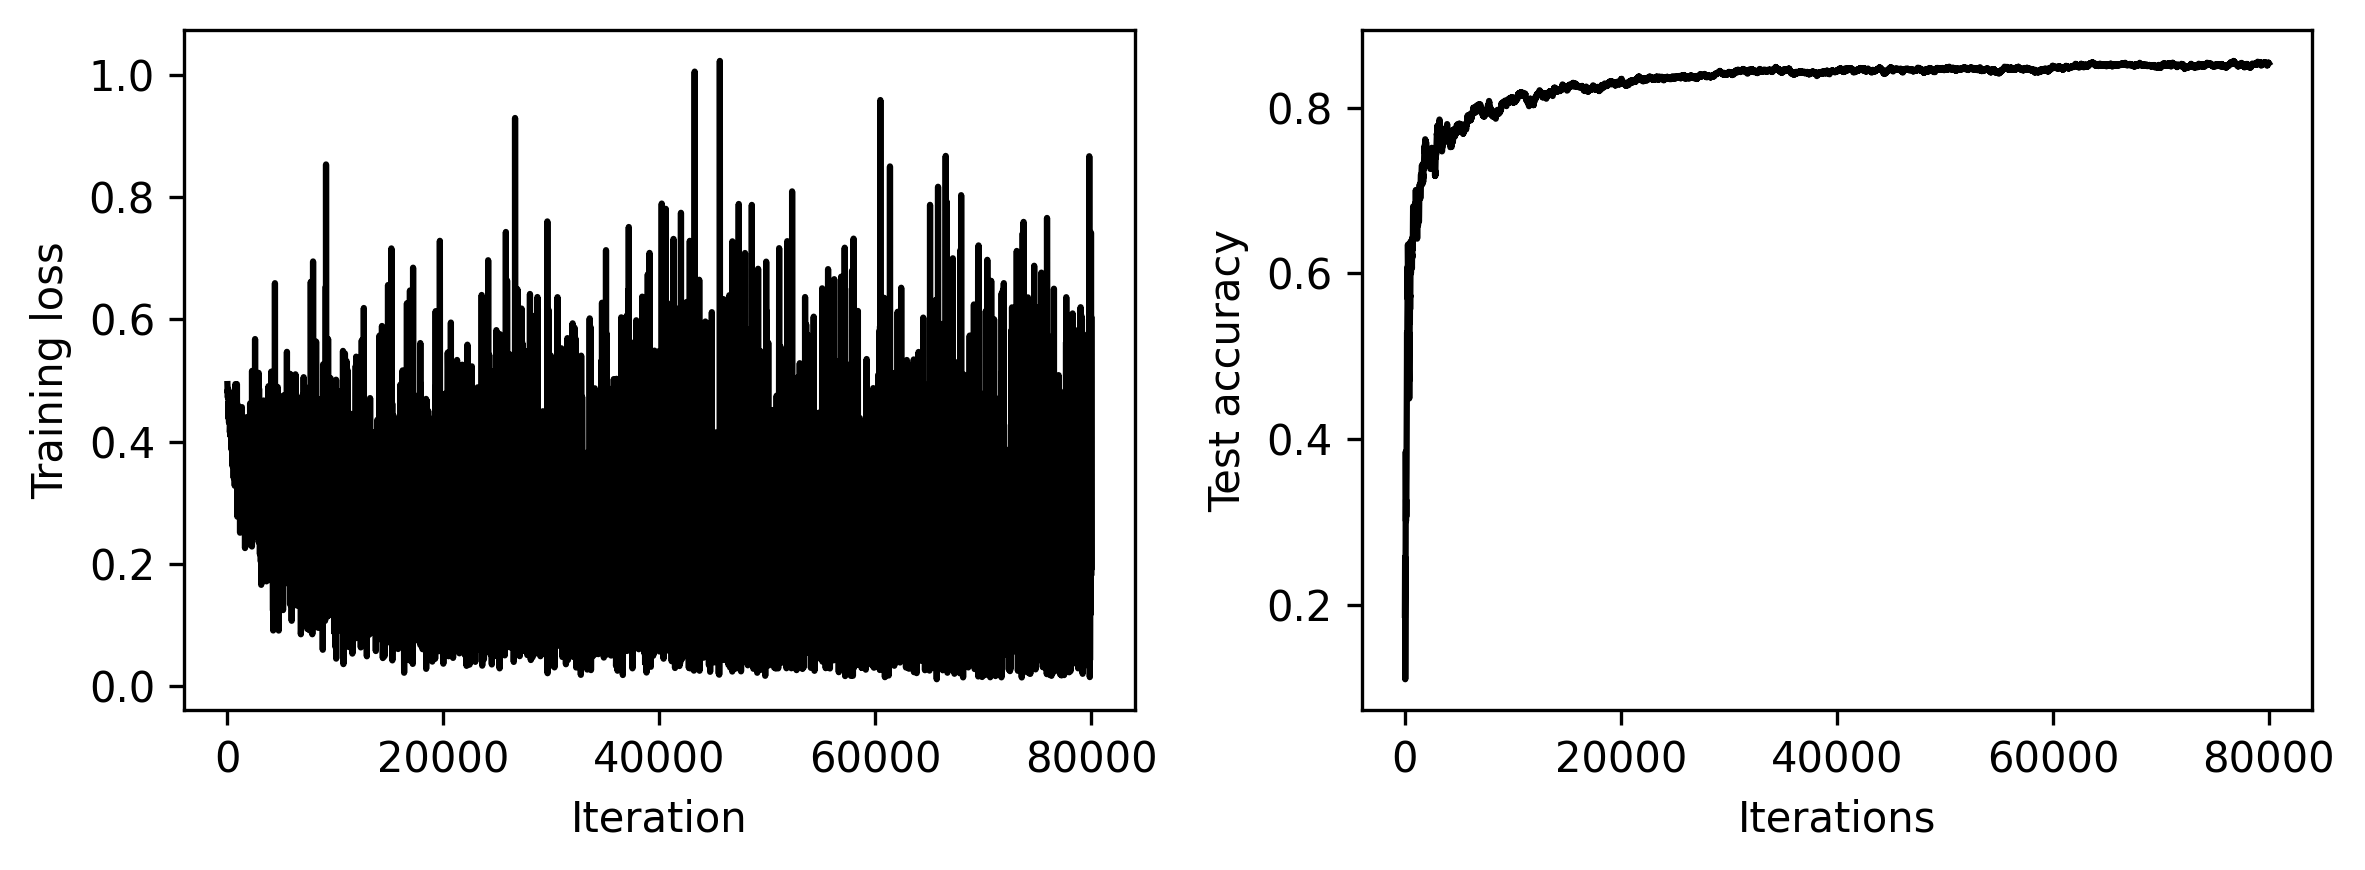

In [25]:
# B = 1
tic = time.time()
_, Loss_1, Acc_1, t = minibatch_sgd(ITRs = 80000, B = 1, eta = 1e-9)
toc = time.time()
print(f"Training time: {toc - tic:.2f} sec")

# plot loss
Plot_Loss_Acc(t, Loss_1, Acc_1)

Iteration: [1000/8000], Training loss: 0.2697, Test accuracy:  81.13%
Iteration: [2000/8000], Training loss: 0.2615, Test accuracy:  83.10%
Iteration: [3000/8000], Training loss: 0.1665, Test accuracy:  83.90%
Iteration: [4000/8000], Training loss: 0.1844, Test accuracy:  84.26%
Iteration: [5000/8000], Training loss: 0.2559, Test accuracy:  84.60%
Iteration: [6000/8000], Training loss: 0.2166, Test accuracy:  84.87%
Iteration: [7000/8000], Training loss: 0.1830, Test accuracy:  84.98%
Iteration: [8000/8000], Training loss: 0.1888, Test accuracy:  85.27%
Training time: 2.21 sec


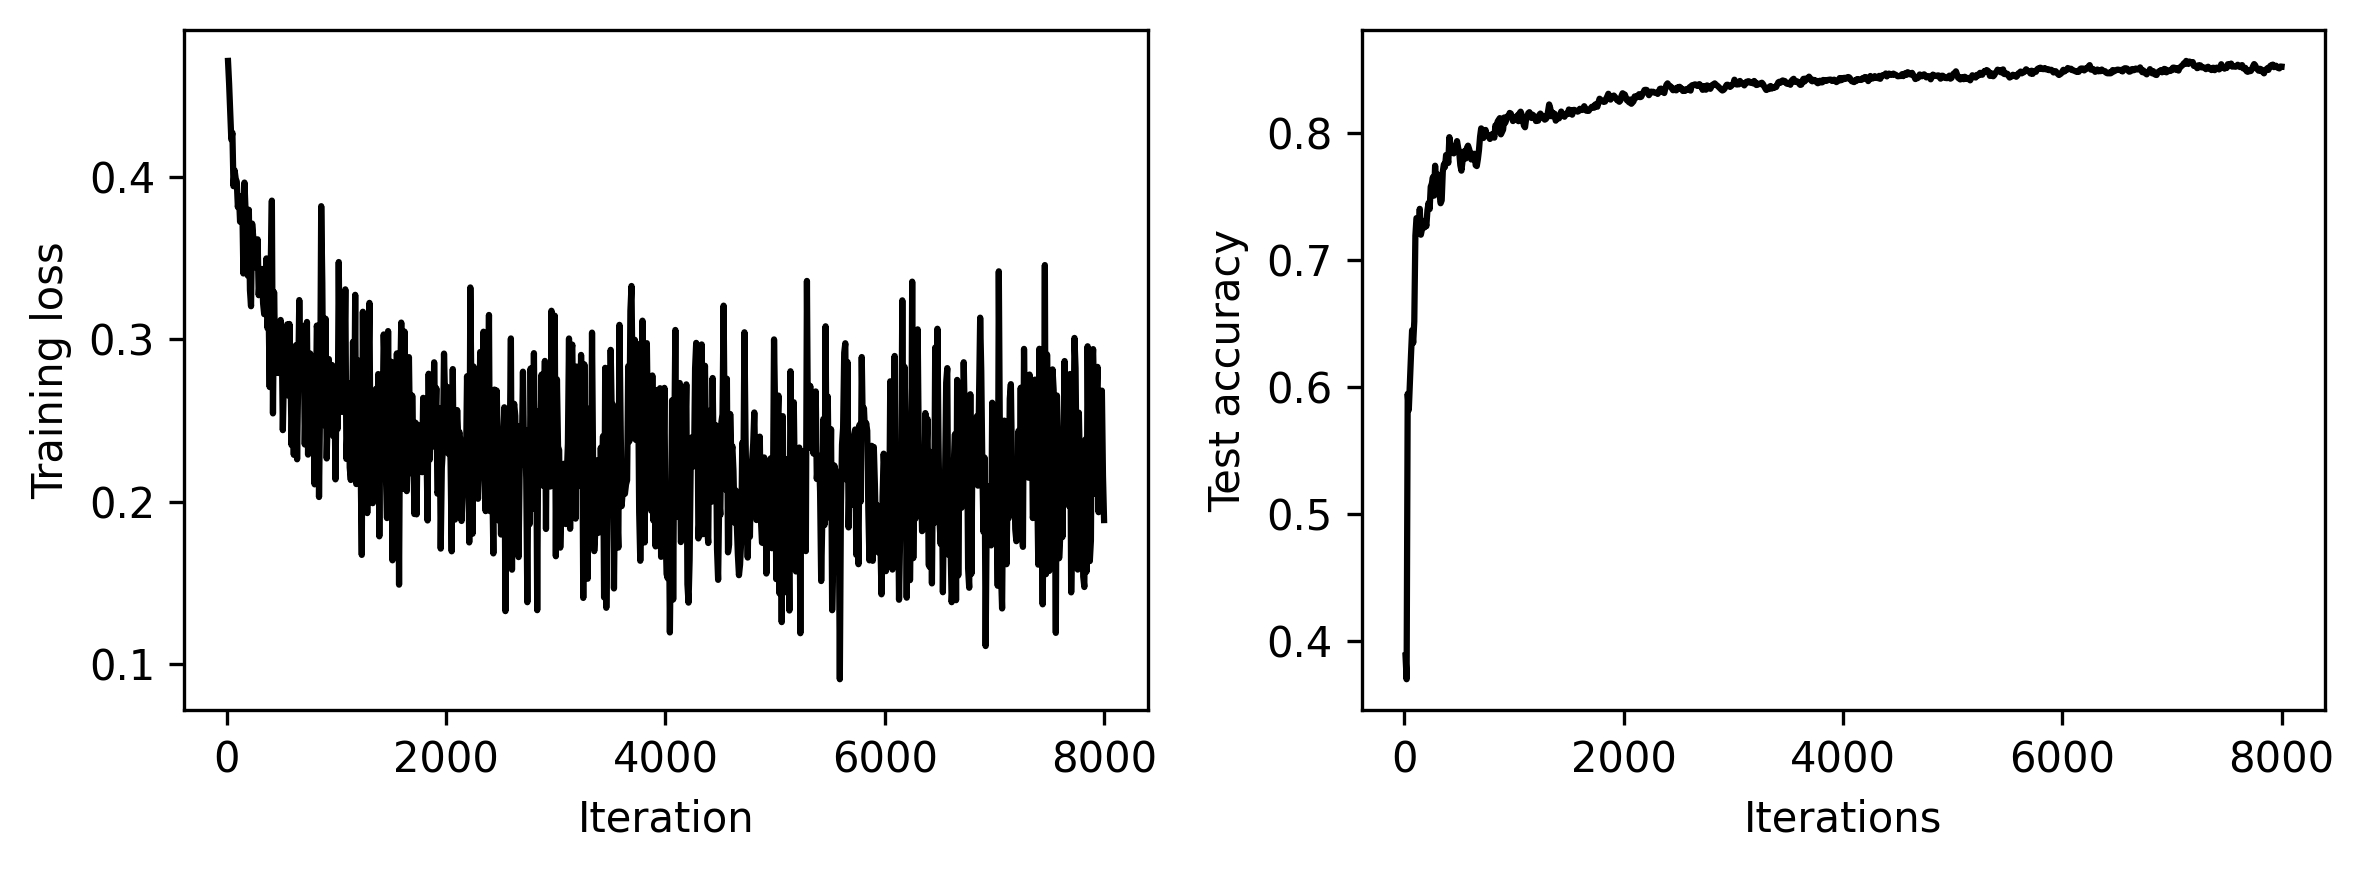

In [26]:
# Bacth size = 10
tic = time.time()
_, Loss_10, Acc_10, t = minibatch_sgd(ITRs = 8000, B = 10, eta = 1e-8)
toc = time.time()
print(f"Training time: {toc - tic:.2f} sec")
# plot loss
Plot_Loss_Acc(t, Loss_10, Acc_10)

Iteration: [1000/2000], Training loss: 0.2048, Test accuracy:  85.31%
Iteration: [2000/2000], Training loss: 0.2049, Test accuracy:  85.73%
Training time: 0.81 sec


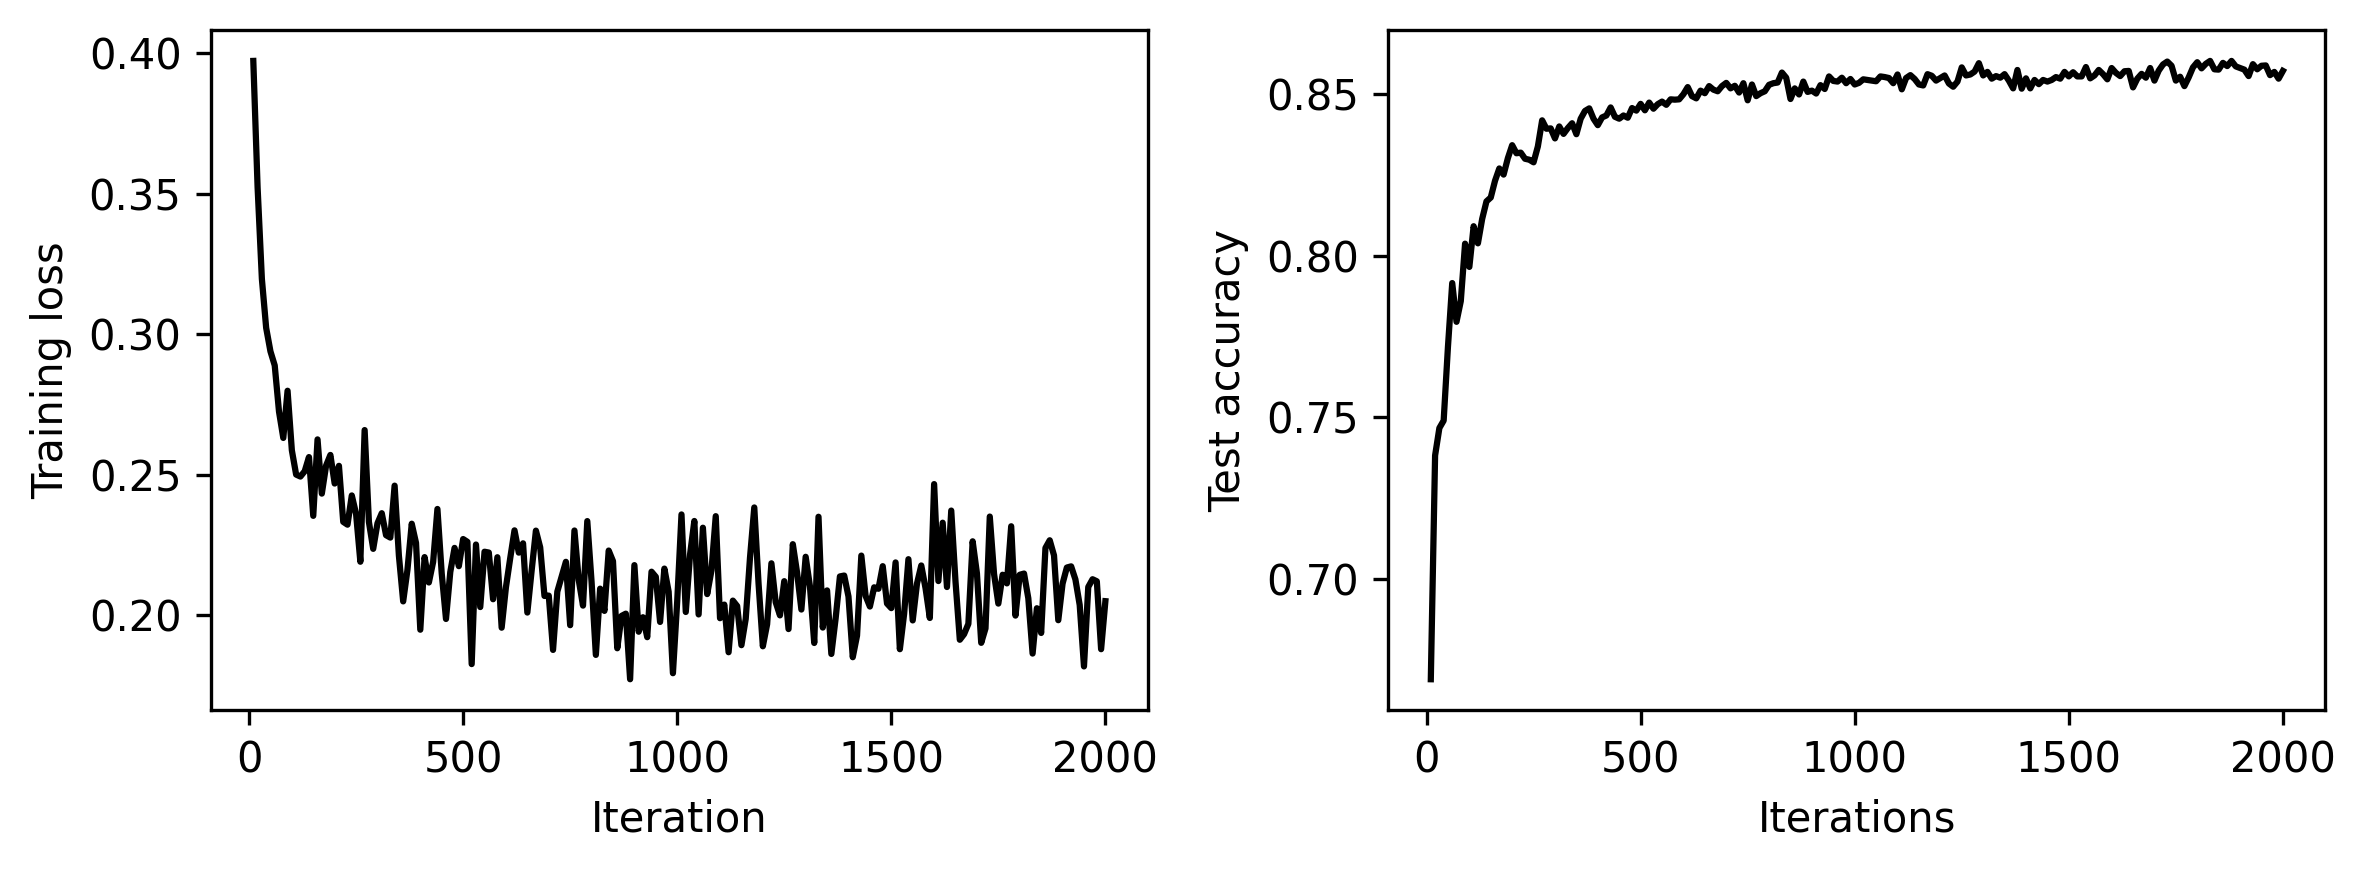

In [27]:
# Bacth size = 100
tic = time.time()
_, Loss_100, Acc_100, t = minibatch_sgd(ITRs = 2000, B = 100, eta = 1e-7)
toc = time.time()
print(f"Training time: {toc - tic:.2f} sec")
# plot loss
Plot_Loss_Acc(t, Loss_100, Acc_100)

Iteration: [1000/2000], Training loss: 0.2116, Test accuracy:  85.60%
Iteration: [2000/2000], Training loss: 0.2146, Test accuracy:  85.74%
Training time: 2.56 sec


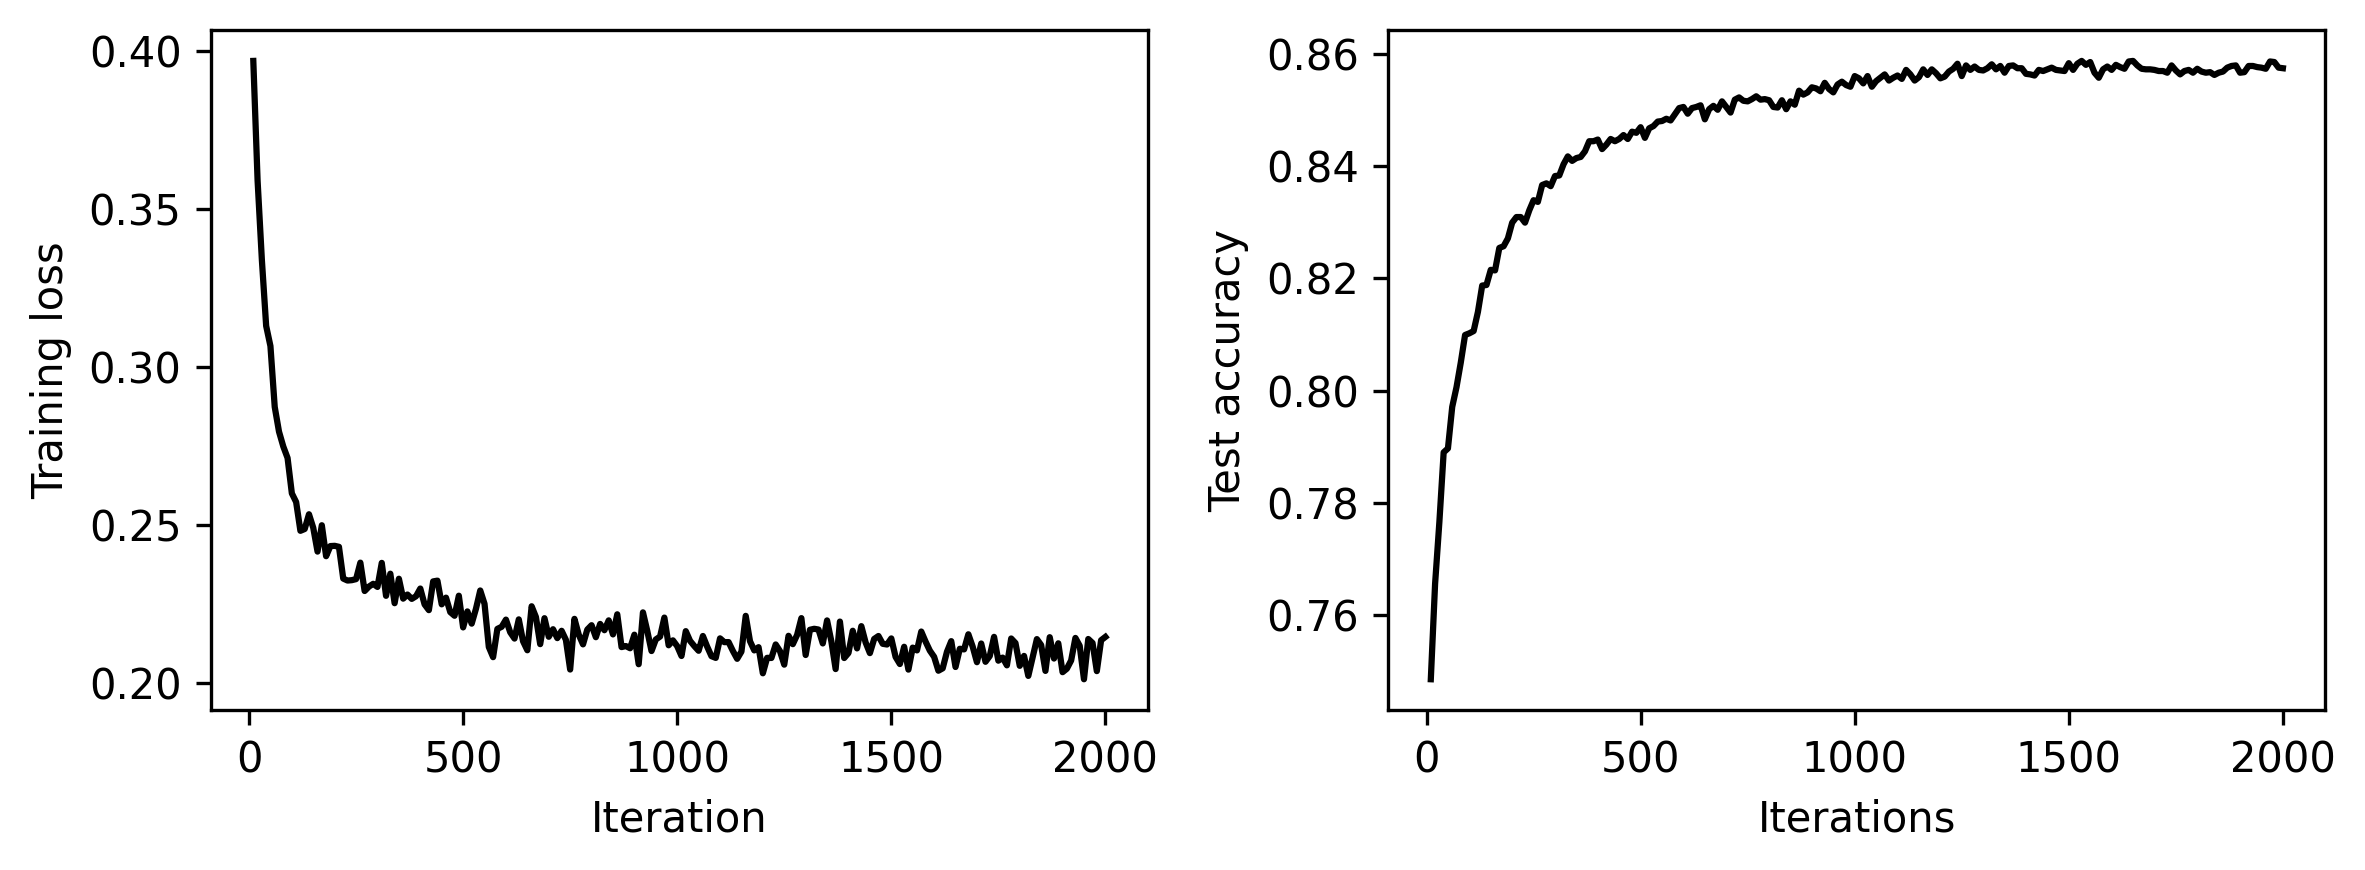

In [28]:
# Bacth size = 1000
tic = time.time()
_, Loss_1000, Acc_1000, t = minibatch_sgd(ITRs = 2000, B = 1000, eta = 1e-7)
toc = time.time()
print(f"Training time: {toc - tic:.2f} sec")
# plot loss
Plot_Loss_Acc(t, Loss_1000, Acc_1000)

# 5. The role of training dataset size
Let us reduce the training dataset size. Instead of N = 50,000, let us pick a subset S ′ of size N ′ from the original dataset without replacement and uniformly at random. Fix batch size to B = 100. Repeat the steps above for N ′ ∈ {100,500,1000,10000}. Comment on the accuracy as a function of dataset size.

In [13]:
# minibatch sgd with sampling data
def minibatch_sgd_sampling(ITRs, B, eta, Ns): # Ns denotes sampling number
    W = torch.zeros(784, 10)
    indices0 = random.sample(range(N_train),Ns)
    X_train_s0, y_train_s0 = X_train[indices0], y_train[indices0] # sampling training and test data
    # W = torch.randn(784, 10)
    Loss = []
    Acc = []
    Time = []
    for ITR in range(ITRs):
        indices = random.sample(range(Ns),B)
        X_train_s, y_train_s = X_train_s0[indices], y_train_s0[indices] # sampling training and test data
        G = torch.mm(X_train_s.T, torch.mm(X_train_s, W) - y_train_s) / B
        W -= eta * G

        if (ITR+1) % record_every == 0:
            Time.append(ITR+1)
            loss = 0.5 * torch.norm(torch.mm(X_train_s, W)- y_train_s) ** 2 / B
            Loss.append(loss)
            y_hat = torch.mm(X_test, W)
            target_hat = torch.max(y_hat, dim=-1)[1]
            acc = torch.sum(targets_test == target_hat)/N_test
            Acc.append(acc)
    return W, Loss, Acc, Time

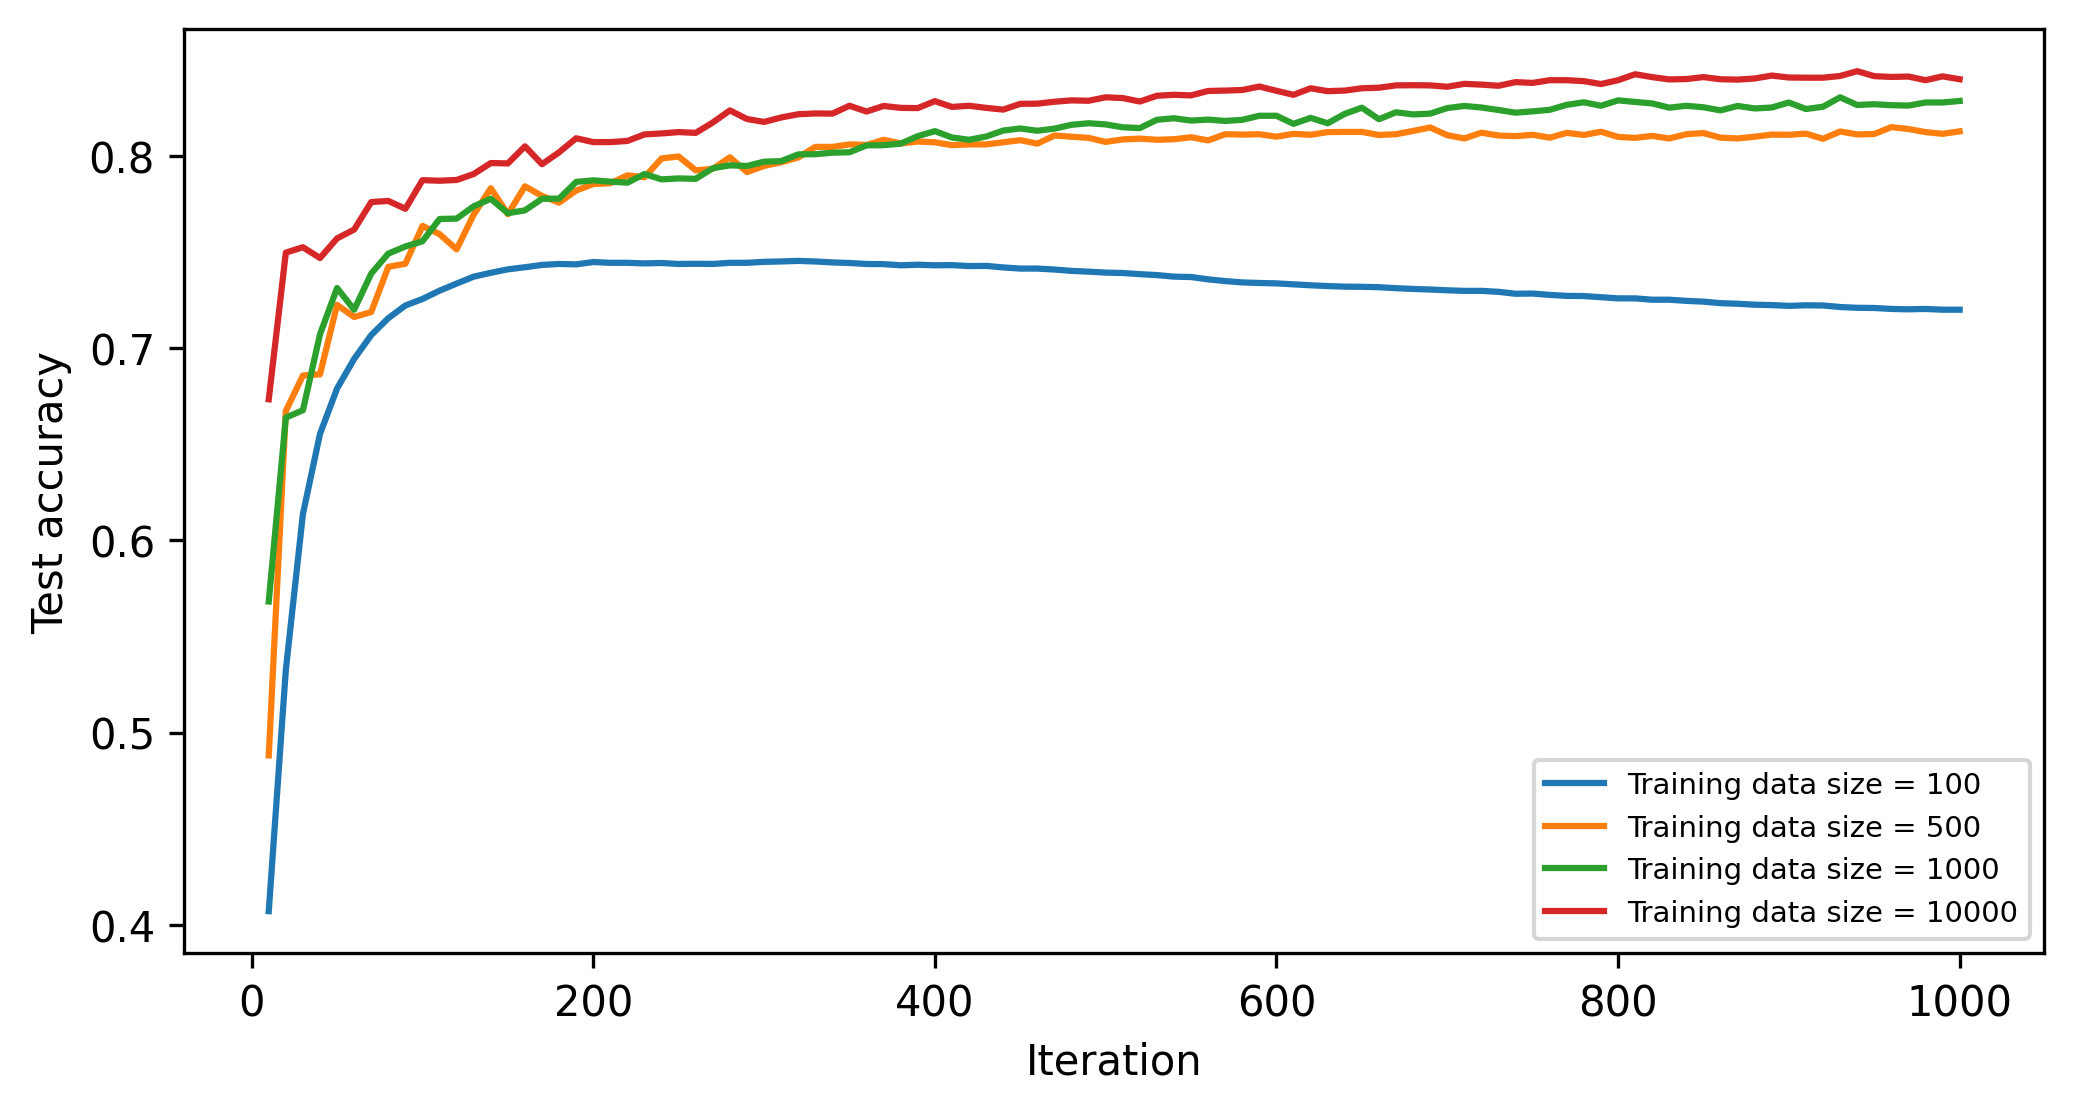

In [14]:
# Bacth size = 100
plt.figure(figsize=(8,4), dpi=300)
for Ns in [100, 500, 1000, 10000]:
      _, _, Acc, t = minibatch_sgd_sampling(ITRs = 1000, B = 100, eta = 5e-8, Ns = Ns)
      plt.plot(t, Acc, label = f"Training data size = {Ns}")
plt.xlabel("Iteration")
plt.ylabel("Test accuracy")
plt.legend(fontsize=7)

# 6. Simpler Life
Run the linear MNIST classifier with batchsize B = 100 over the full dataset by using PyTorch or Tensorflow. Use same learning rate and initialization $W_0 = 0$. Verify that it is consistent with your handcoded algorithm by comparing your results (the accuracy and training loss plots).

In [15]:
# Model using pytorch
class Linear(nn.Module):
    def __init__(self):
        super(Linear, self).__init__()
        self.linear = nn.Linear(784, 10, bias=False)
        torch.nn.init.zeros_(self.linear.weight) 
    def forward(self, x):
        return self.linear(x)

In [16]:
# minibatch sgd using pytorch
class Linear(nn.Module):
    def __init__(self):
        super(Linear, self).__init__()
        self.linear = nn.Linear(784, 10, bias=False)
        torch.nn.init.zeros_(self.linear.weight)
    def forward(self, x):
        return self.linear(x)

def minibatch_sgd_pytorch(ITRs, B, lr):
    model = Linear()
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    Acc = []
    Time = []
    Loss = []
    for ITR in range(ITRs):
        indices = random.sample(range(N_train),B)
        X_train_s, y_train_s = X_train[indices], y_train[indices] # sampling training and test data
        y_pred = model(X_train_s)
        loss = 0.5 * 10 * criterion(y_pred, y_train_s) # loss = 0.5 * 10 * MSE
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (ITR+1) % record_every == 0:
            Time.append(ITR + 1)
            y_hat = model(X_test)
            _, target_hat = torch.max(y_hat, 1)
            # target_hat = torch.max(y_hat, dim=-1)[1]
            acc = torch.sum(targets_test == target_hat)/N_test
            Acc.append(acc)
            Loss.append(loss.item())
            if (ITR+1) % print_every == 0:
                print(f'Pytorch model - Iteration: [{ITR+1}/{ITRs}], Training loss: {loss.item():.4f}, Test accuracy: {acc * 100: .2f}%')
    return model, Loss, Acc, Time

Iteration: [1000/2000], Training loss: 0.2033, Test accuracy:  85.48%
Iteration: [2000/2000], Training loss: 0.2139, Test accuracy:  85.48%
Pytorch model - Iteration: [1000/2000], Training loss: 0.2313, Test accuracy:  85.39%
Pytorch model - Iteration: [2000/2000], Training loss: 0.2174, Test accuracy:  85.91%


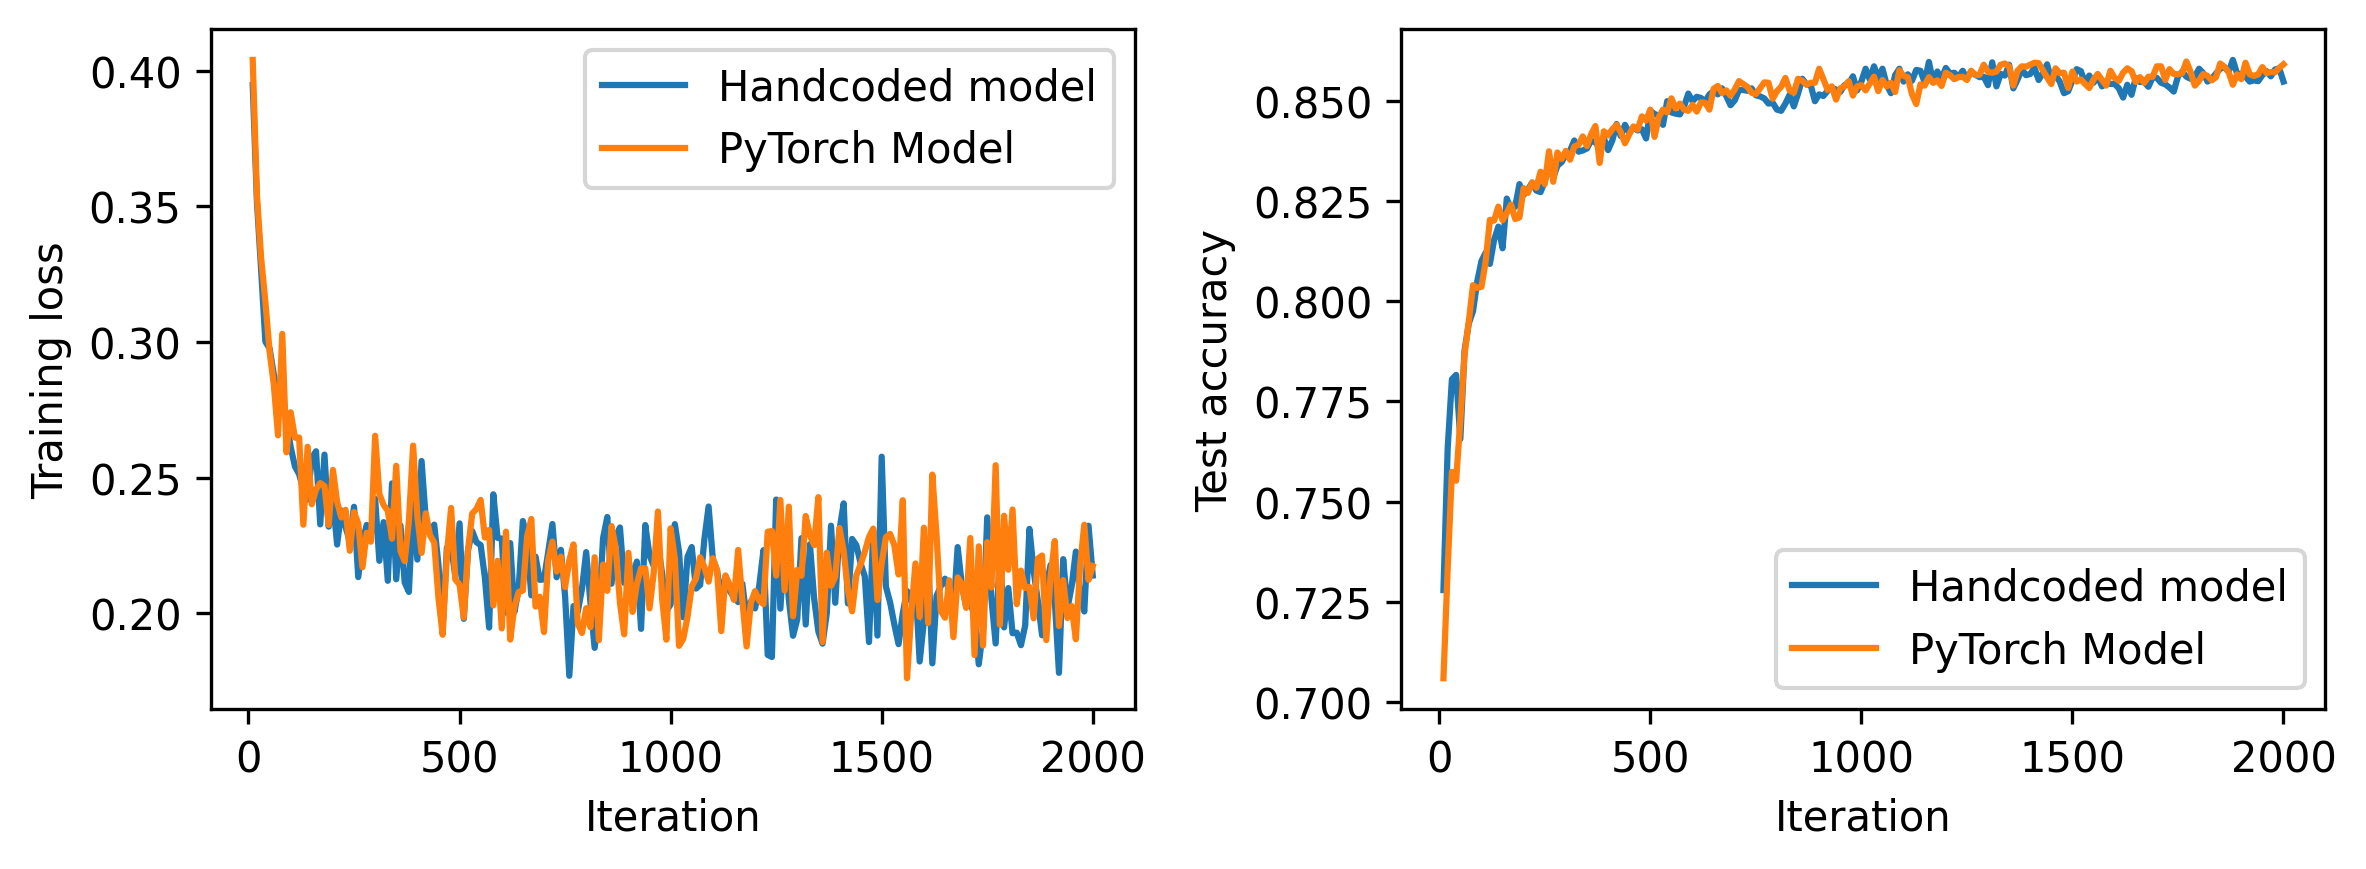

In [31]:
# Parameters configuration
ITRs = 2000
lr = 1e-7
B = 100

# handcoded algorithm
W, Loss, Acc, t = minibatch_sgd(ITRs, B, lr)
_, Loss_Pytorch, Acc_Pytorch, _ = minibatch_sgd_pytorch(ITRs, B, lr)

# Plot the Comparison between PyTorch model and Handcoded model
plt.figure(figsize = (8,3), dpi=300)
plt.subplot(1,2,1)
# plt.title("Training loss")
plt.plot(t, Loss, label = "Handcoded model")
plt.plot(t, Loss_Pytorch, label = "PyTorch Model")
plt.xlabel("Iteration")
plt.ylabel("Training loss")
plt.legend()
plt.subplot(1,2,2)
# plt.title("Test accuracy")
plt.plot(t, Acc, label = "Handcoded model")
plt.plot(t, Acc_Pytorch, label = "PyTorch Model")
plt.xlabel("Iteration")
plt.ylabel("Test accuracy")
plt.legend()
plt.tight_layout()